## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.01, 0.1, 0.5, 0.95]
NESTEROV = [False, True]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Momentum = %.2f, Nesterov = %s" % (momentum, nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-momentum-%s-nesterov-%s" % (str(momentum), str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with Momentum = 0.01, Nesterov = False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5000

50000/50000 [==============================] - 8s 154us/step - loss: 1.2543 - accuracy: 0.5606 - val_loss: 1.4525 - val_accuracy: 0.4832
Epoch 49/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2361 - accuracy: 0.5657 - val_loss: 1.4892 - val_accuracy: 0.4823
Epoch 50/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.2306 - accuracy: 0.5683 - val_loss: 1.3756 - val_accuracy: 0.5117
Experiment with Momentum = 0.01, Nesterov = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________

50000/50000 [==============================] - 8s 168us/step - loss: 1.2453 - accuracy: 0.5631 - val_loss: 1.3627 - val_accuracy: 0.5177
Epoch 46/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.2438 - accuracy: 0.5632 - val_loss: 1.3914 - val_accuracy: 0.5073
Epoch 47/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.2405 - accuracy: 0.5636 - val_loss: 1.3890 - val_accuracy: 0.5072
Epoch 48/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2337 - accuracy: 0.5675 - val_loss: 1.4024 - val_accuracy: 0.4923
Epoch 49/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.2209 - accuracy: 0.5704 - val_loss: 1.4051 - val_accuracy: 0.5001
Epoch 50/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.2198 - accuracy: 0.5731 - val_loss: 1.4800 - val_accuracy: 0.4770
Experiment with Momentum = 0.10, Nesterov = False
Model: "model_1"
___________________________________________________

50000/50000 [==============================] - 8s 155us/step - loss: 1.2556 - accuracy: 0.5587 - val_loss: 1.4258 - val_accuracy: 0.4937
Epoch 43/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2528 - accuracy: 0.5590 - val_loss: 1.5916 - val_accuracy: 0.4430
Epoch 44/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.2490 - accuracy: 0.5627 - val_loss: 1.3935 - val_accuracy: 0.5070
Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2404 - accuracy: 0.5630 - val_loss: 1.4727 - val_accuracy: 0.4807
Epoch 46/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.2327 - accuracy: 0.5677 - val_loss: 1.3843 - val_accuracy: 0.5104
Epoch 47/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.2247 - accuracy: 0.5715 - val_loss: 1.4323 - val_accuracy: 0.4912
Epoch 48/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.2205 - accuracy: 0.5720 - val_loss:

50000/50000 [==============================] - 9s 176us/step - loss: 1.2860 - accuracy: 0.5482 - val_loss: 1.4545 - val_accuracy: 0.4742
Epoch 40/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.2779 - accuracy: 0.5485 - val_loss: 1.5457 - val_accuracy: 0.4616
Epoch 41/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.2704 - accuracy: 0.5556 - val_loss: 1.4690 - val_accuracy: 0.4740
Epoch 42/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.2627 - accuracy: 0.5573 - val_loss: 1.4036 - val_accuracy: 0.5015
Epoch 43/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.2620 - accuracy: 0.5567 - val_loss: 1.3744 - val_accuracy: 0.5075
Epoch 44/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.2505 - accuracy: 0.5610 - val_loss: 1.3893 - val_accuracy: 0.5055
Epoch 45/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.2434 - accuracy: 0.5642 - val_loss:

50000/50000 [==============================] - 8s 154us/step - loss: 1.1452 - accuracy: 0.5957 - val_loss: 1.3777 - val_accuracy: 0.5128
Epoch 37/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.1330 - accuracy: 0.6012 - val_loss: 1.3484 - val_accuracy: 0.5174
Epoch 38/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.1193 - accuracy: 0.6072 - val_loss: 1.4494 - val_accuracy: 0.4979
Epoch 39/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.1177 - accuracy: 0.6084 - val_loss: 1.3520 - val_accuracy: 0.5203
Epoch 40/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.0997 - accuracy: 0.6155 - val_loss: 1.4222 - val_accuracy: 0.5080
Epoch 41/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.1005 - accuracy: 0.6137 - val_loss: 1.3888 - val_accuracy: 0.5052
Epoch 42/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.0905 - accuracy: 0.6167 - val_loss:

50000/50000 [==============================] - 9s 179us/step - loss: 1.2154 - accuracy: 0.5741 - val_loss: 1.4570 - val_accuracy: 0.4944
Epoch 34/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.2032 - accuracy: 0.5767 - val_loss: 1.5533 - val_accuracy: 0.4532
Epoch 35/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.1982 - accuracy: 0.5786 - val_loss: 1.4245 - val_accuracy: 0.4916
Epoch 36/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.1837 - accuracy: 0.5830 - val_loss: 1.3694 - val_accuracy: 0.5139
Epoch 37/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.1736 - accuracy: 0.5887 - val_loss: 1.3791 - val_accuracy: 0.5155
Epoch 38/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.1694 - accuracy: 0.5905 - val_loss: 1.3305 - val_accuracy: 0.5283
Epoch 39/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.1604 - accuracy: 0.5954 - val_loss:

50000/50000 [==============================] - 8s 155us/step - loss: 0.9327 - accuracy: 0.6666 - val_loss: 1.4208 - val_accuracy: 0.5277
Epoch 31/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.9327 - accuracy: 0.6655 - val_loss: 1.4114 - val_accuracy: 0.5278
Epoch 32/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.9038 - accuracy: 0.6755 - val_loss: 1.4265 - val_accuracy: 0.5173
Epoch 33/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8850 - accuracy: 0.6820 - val_loss: 1.4371 - val_accuracy: 0.5373
Epoch 34/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8667 - accuracy: 0.6887 - val_loss: 1.4764 - val_accuracy: 0.5227
Epoch 35/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8479 - accuracy: 0.6943 - val_loss: 1.4893 - val_accuracy: 0.5234
Epoch 36/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.8209 - accuracy: 0.7058 - val_loss:

50000/50000 [==============================] - 9s 174us/step - loss: 0.8051 - accuracy: 0.7122 - val_loss: 1.4579 - val_accuracy: 0.5304
Epoch 28/50
50000/50000 [==============================] - 9s 179us/step - loss: 0.7661 - accuracy: 0.7254 - val_loss: 1.5484 - val_accuracy: 0.5242
Epoch 29/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.7569 - accuracy: 0.7291 - val_loss: 1.4840 - val_accuracy: 0.5437
Epoch 30/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.7289 - accuracy: 0.7399 - val_loss: 1.5321 - val_accuracy: 0.5349
Epoch 31/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.7088 - accuracy: 0.7474 - val_loss: 1.6034 - val_accuracy: 0.5298
Epoch 32/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.6776 - accuracy: 0.7571 - val_loss: 1.6288 - val_accuracy: 0.5313
Epoch 33/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.6682 - accuracy: 0.7583 - val_loss:

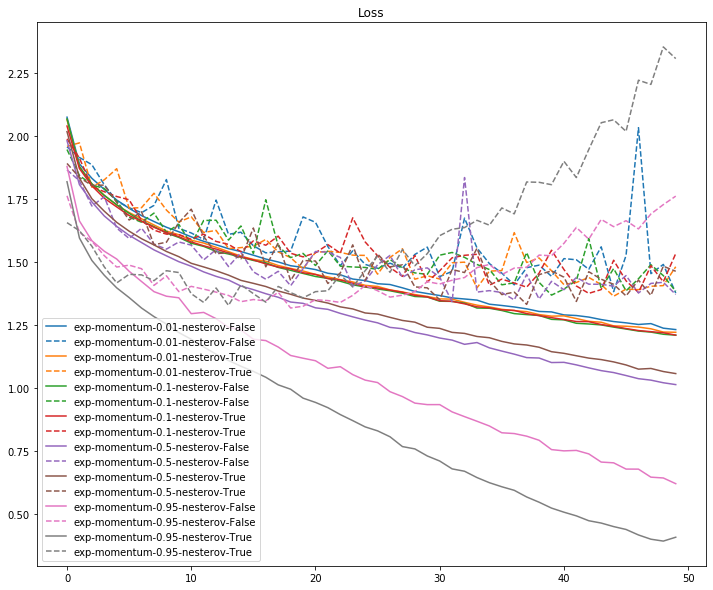

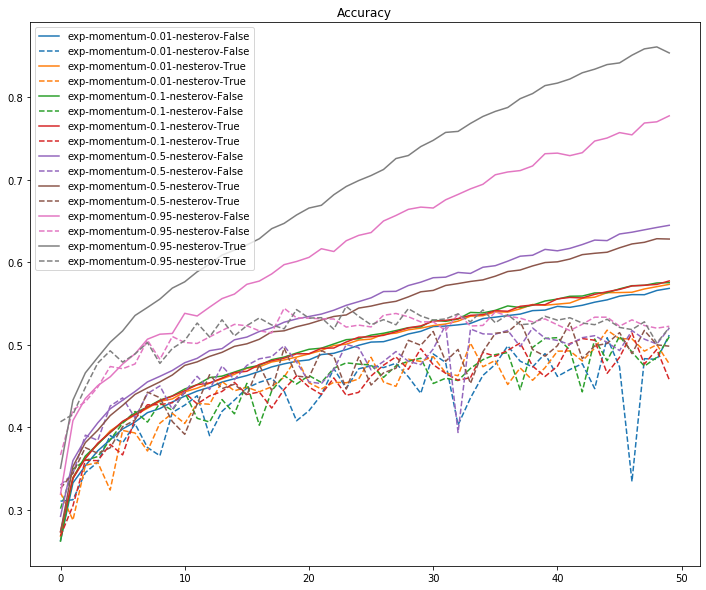

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc = 'lower left')
plt.show()

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc = 'upper left')
plt.show()